In [1]:
# coding: utf-8

# In[20]:


import keras
keras.__version__


# # Classifying movie reviews: a binary classification example
# 
# ## The IMDB dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]


# In[23]:


train_labels[0]

Using TensorFlow backend.


17473536/17464789 [==============================] - 1s 0us/step


1

In [2]:


# Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

max([max(sequence) for sequence in train_data])


# For kicks, here's how you can quickly decode one of these reviews back to English words:


# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])



decoded_review


1654784/1641221 [==============================] - 0s 0us/step


u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [0]:
# Preparing the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)



In [0]:

# Here's what our samples look like now:

x_train[0]


# We should also vectorize our labels, which is straightforward:

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:

# Now our data is ready to be fed into a neural network.

# Building our network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [0]:

# Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. Note that we will 
# also monitor accuracy during training.

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# The latter can be done by passing function objects as the `loss` or `metrics` arguments:


In [8]:

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## Validating our approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_dict = history.history
history_dict.keys()


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.5045 - binary_accuracy: 0.7874 - val_loss: 0.3781 - val_binary_accuracy: 0.8697
Epoch 2/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2992 - binary_accuracy: 0.9048 - val_loss: 0.3003 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.2173 - binary_accuracy: 0.9279 - val_loss: 0.3079 - val_binary_accuracy: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1747 - binary_accuracy: 0.9439 - val_loss: 0.2833 - val_binary_accuracy: 0.8848
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1422 - binary_accuracy: 0.9539 - val_loss: 0.2857 - val_binary_accuracy: 0.8855
Epoch 6/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1147 - binary_accuracy: 0.9651 - val_loss: 0.3124 - val_bi

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']

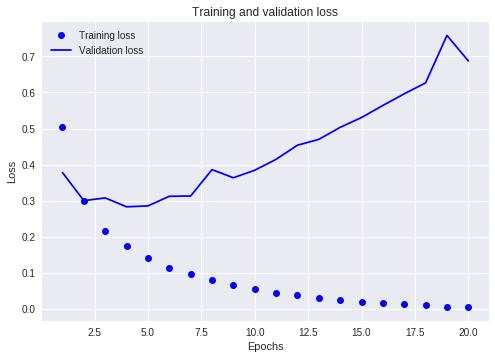

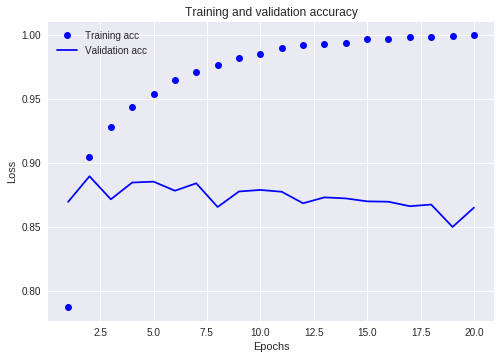

In [10]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Let's train a new network from scratch for four epochs, then evaluate it on our test data:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [11]:

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


results

## Using a trained network to generate predictions on new data

model.predict(x_test)


Epoch 1/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.4737 - acc: 0.8224
Epoch 2/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.2674 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.2033 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 84us/step


array([[0.1617956 ],
       [0.9998498 ],
       [0.4020611 ],
       ...,
       [0.08181959],
       [0.04903647],
       [0.45625064]], dtype=float32)